In [1]:
import numpy as np
import torch
from tqdm import tqdm,tqdm_notebook
import torchvision
from torch.utils.data import Dataset,DataLoader
import matplotlib
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn ,optim
import torch.nn.functional as F
from torch.utils import data
import cv2

In [2]:
data_set = torchvision.datasets.CIFAR10(root='CIFAR10',train = True , download= True ,
                                              transform = transforms.Compose([transforms.ToTensor()]))

Files already downloaded and verified


In [3]:
len(data_set)

50000

In [4]:
train , val , test = data.random_split(data_set , [40_000,5_000,5_000])
train_loader = DataLoader( train , batch_size = 16 , shuffle = True)
test_loader  = DataLoader( test , batch_size = 16 , shuffle = True)
val_loader   = DataLoader( val , batch_size = 16 , shuffle = True)

In [5]:
for imgs,labels in train_loader:
#     print(imgs.shape,labels.shape)
    print(labels)
    break

tensor([1, 4, 1, 4, 4, 7, 4, 2, 3, 4, 5, 7, 3, 3, 6, 7])


## Model

In [6]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32,64,3,padding=1)
        self.fc1 = nn.Linear(64*4*4,512)
        self.fc2 = nn.Linear(512,10)
#         self.fc3 = nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.25)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,(2,2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,(2,2))
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x,(2,2))
#         x = F.relu(self.conv3(x))
#         x = F.max_pool2d(x,(2,2))
        x = self.dropout(x)
        x = torch.flatten(x,start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
#         x = F.relu(self.fc2(x))
#         x = self.dropout(x)
        x = self.fc2(x)
#         x = F.log_softmax(x,dim=1)
#         x = F.relu(self.fc2(x))
        return x
model = net()    

In [7]:
for imgs,labels in val_loader:
    output = model(imgs)
    print(output.shape)
    print(labels.shape)
#     print(output)
    break


torch.Size([16, 10])
torch.Size([16])


## Accuracy of the model before training

In [9]:
model.eval()
with torch.no_grad():
    a_count = 0
    a_total = 0
    for images,labels in test_loader:
        prediction = model(images)
        pred_names = torch.argmax(prediction,dim=1)
        for each_prediction,each_label in zip(pred_names,labels):
            if each_prediction == each_label:
                a_count +=1 
            a_total +=1

print("The accuracy of the model is : ",a_count*100/a_total)   

The accuracy of the model is :  10.16


In [10]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

In [11]:
epochs = 10

## Training

In [21]:
model.train()
i = 0
for e in range(epochs):
    total = 0
    count = 0
    running_loss = 0
  
    for images,labels in train_loader:
        optimizer.zero_grad()
        output = model.forward(images)
        loss = loss_function(output,labels)
        loss.backward() 
        optimizer.step()
        running_loss += loss.item()
    i+=1
    val_loss = 0
#     for images,labels in val_loader:
        
#         optimizer.zero_grad()
#         with torch.no_grad():
#             output = model.forward(images)
#         loss = loss_function(output,labels)
#         val_loss += loss.item()
# #     if running_loss/len(train_loader)>val_loss/len(val_loader):
# #         torch.save(model.state_dict(), 'mode1.pth')
    
#     if (val_loss/len(val_loader))<0.92:
#         torch.save(model.state_dict(), 'mode_90.pth')        
#     print(i,". Training loss : ",running_loss/len(train_loader),"   Validation loss : ",val_loss/len(val_loader))
#     model.eval()
    with torch.no_grad():
        a_count = 0
        a_total = 0
        for images,labels in train_loader:
            prediction = model(images)
            pred_names = torch.argmax(prediction,dim=1)
            for each_prediction,each_label in zip(pred_names,labels):
                if each_prediction == each_label:
                    a_count +=1 
                a_total +=1
    print(i,"Training loss : ",running_loss/len(train_loader),"  Accuracy : ",a_count*100/a_total)

1 Training loss :  1.9808608723640442   Accuracy :  37.93
2 Training loss :  1.5027493592977523   Accuracy :  48.65
3 Training loss :  1.2884500827312468   Accuracy :  58.7475
4 Training loss :  1.139522821855545   Accuracy :  62.68
5 Training loss :  1.0292729335308075   Accuracy :  66.96
6 Training loss :  0.9437246016561985   Accuracy :  69.37
7 Training loss :  0.8757971211254597   Accuracy :  70.7425
8 Training loss :  0.814560050547123   Accuracy :  73.8675
9 Training loss :  0.7621770196795463   Accuracy :  75.66
10 Training loss :  0.7226437064528465   Accuracy :  78.615


## Evaluating the model

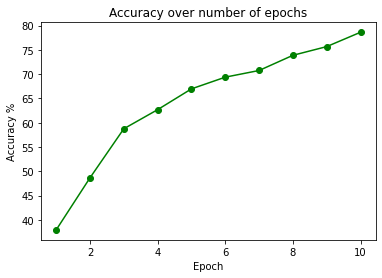

In [12]:
accuracies_array = np.array([37.93,48.65,58.7475,62.68,66.96,69.37,70.7425,73.8675,75.66,78.615])
training_loss_array = np.array([1.9808608723640442,1.5027493592977523,1.2884500827312468,1.139522821855545,1.0292729335308075,
                         0.9437246016561985 ,0.8757971211254597,0.814560050547123,0.7621770196795463,0.7226437064528465])
# print(len(accuracies_array),len(training_loss_array))
ep = [i for i in range(1,11)]
import matplotlib.pyplot as plt
plt.title("Accuracy over number of epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.plot(ep,accuracies_array,marker='o',color='green')

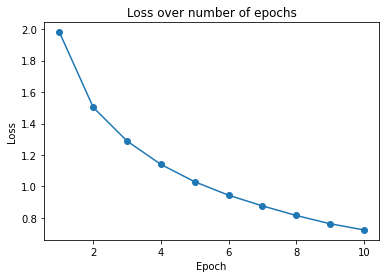

In [13]:
plt.title("Loss over number of epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(ep,training_loss_array,marker='o')

In [21]:
model.load_state_dict(torch.load('mode.pth'))

<All keys matched successfully>

In [22]:
model.eval()
with torch.no_grad():
    a_count = 0
    a_total = 0
    for images,labels in test_loader:
        prediction = model(images)
        pred_names = torch.argmax(prediction,dim=1)
        for each_prediction,each_label in zip(pred_names,labels):
            if each_prediction == each_label:
                a_count +=1 
            a_total +=1

print("The final accuracy of the model is : ",a_count*100/a_total)       

The final accuracy of the model is :  88.78


In [16]:
names = { 0:'Plane' ,1:'Car' ,2:'Bird',3:'Cat' ,4:'Deer',5:'Dog' ,6:'Frog',7:'Horse' ,8:'Boat', 9:'Truck' } 

## Testing the model on images from the web 

Text(0.5, 0, 'Prediction : Horse')

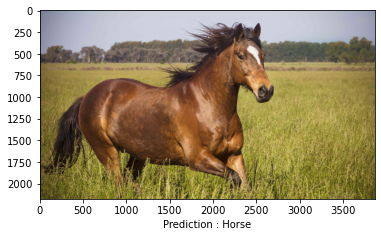

In [28]:
import requests
from PIL import Image

url = "https://www.thesprucepets.com/thmb/KYaXBSM013GnZ2jEZJnX4a9oIsU=/3865x2174/smart/filters:no_upscale()/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg"
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)
transform = transforms.Compose([transforms.Resize((32,32)),
                               transforms.ToTensor()
                               ])
img_1 = transform(img)  
img_2= img_1.unsqueeze(0)
output = model(img_2)
pred = (torch.argmax(output,dim=1))[0]
plt.xlabel(f"Prediction : {names[int(pred)]}")